# Covid 19 Data Analysis and Prediction

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import requests # Get URL data
from bs4 import BeautifulSoup # Manipulate URL data
import json
from pandas import DataFrame as df

### Grab Data from URL

In [168]:
# Grab all data from URL
web_page = requests.get("https://www.worldometers.info/coronavirus")
soup = BeautifulSoup(web_page.text, 'html.parser')

### Basic Covid Data

In [169]:
# Find basic data in div with class name maincounter-number
covid_data = soup.find_all("div",class_ = "maincounter-number")

print("Coronavirus Cases: ", covid_data[0].text.strip())
print("Deaths: ", covid_data[1].text.strip())
print("Recovered: ", covid_data[2].text.strip())


Coronavirus Cases:  179,150,354
Deaths:  3,879,405
Recovered:  163,702,349


In [213]:
# Search for table with id main_table_countries_today
results = soup.find(id='main_table_countries_today')
# Find all tds
content = results.find_all('td')

In [171]:
clean_data = ""
# Use a different separator since the commas cause confusion
for data in content:
    clean_data += data.text.strip() + "|"
# Get rid of pluses
clean_data = clean_data.replace("+", "")
# Get rid of N/A
clean_data = clean_data.replace("N/A", "0")
print(clean_data)

|North America|40,336,362|10,798|911,686|278|33,669,010|19,165|5,755,666|11,199||||||North America||||||||Asia|54,478,619|124,783|767,338|2,333|51,822,390|149,730|1,888,891|26,918||||||Asia||||||||South America|31,553,740|8,246|968,781|209|28,558,613|16,368|2,026,346|31,612||||||South America||||||||Europe|47,461,414|34,839|1,092,505|589|44,938,827|32,012|1,430,082|8,849||||||Europe||||||||Africa|5,247,983|21,621|137,814|338|4,644,765|12,242|465,404|4,098||||||Africa||||||||Oceania|71,515|180|1,266|1|68,038|5|2,211|10||||||Australia/Oceania|||||||||721||15||706||0|0||||||||||||||World|179,150,354|200,467|3,879,405|3,748|163,702,349|229,522|11,568,600|82,686|22,983|497.7||||All|||||||1|USA|34,404,562|2,850|617,123|43|28,708,384|13,541|5,079,055|3,966|103,355|1,854|498,975,944|1,498,984|332,876,117|North America|10|539|1|9|0.1|15,258|2|India|29,934,361|53,009|388,164|1,113|28,836,529|78,082|709,668|8,944|21,488|279|391,019,083|280,685|1,393,086,773|Asia|47|3,589|4|38|0.8|509|3|Brazil|17,

### Cleaning Up with Regex

In [172]:
import re

# Got a list of countries from the website
countries = [
    'usa', 'spain', 'italy', 'france', 'germany', 'uk', 'turkey', 'iran', 
    'russia', 'brazil', 'canada', 'belgium', 'netherlands', 'switzerland', 
    'india', 'peru', 'portugal', 'ecuador', 'ireland', 'sweden', 'saudi-arabia', 
    'israel', 'austria', 'mexico', 'singapore', 'japan', 'chile', 'pakistan', 
    'poland', 'romania', 'belarus', 'qatar', 'south-korea', 'united-arab-emirates', 
    'indonesia', 'ukraine', 'denmark', 'serbia', 'philippines', 'norway', 
    'australia', 'dominican-republic', 'bangladesh', 'malaysia', 
    'panama', 'colombia', 'finland', 'south-africa', 'egypt', 'morocco', 'argentina', 
    'luxembourg', 'moldova', 'algeria', 'kuwait', 'thailand', 'kazakhstan', 
    'bahrain', 'hungary', 'greece', 'oman', 'croatia', 'uzbekistan', 'iraq', 
    'armenia', 'iceland', 'afghanistan', 'estonia', 'azerbaijan', 'cameroon', 
    'bosnia-and-herzegovina', 'ghana', 'new-zealand', 'lithuania', 'slovenia', 
    'macedonia', 'slovakia', 'cuba', 'bulgaria', 'nigeria', 'cote-d-ivoire', 
    'china-hong-kong-sar', 'djibouti', 'guinea', 'bolivia', 'tunisia', 'latvia', 
    'cyprus', 'andorra', 'albania', 'lebanon', 'niger', 'kyrgyzstan', 'costa-rica', 
    'senegal', 'honduras', 'burkina-faso', 'uruguay', 'sri-lanka', 'san-marino', 
    'channel-islands', 'guatemala', 'georgia', 'democratic-republic-of-the-congo', 
    'malta', 'jordan', 'somalia', 'taiwan', 'reunion', 'mayotte', 'mali', 'kenya', 
    'jamaica', 'state-of-palestine', 'mauritius', 'venezuela', 'el-salvador', 
    'montenegro', 'isle-of-man', 'tanzania', 'viet-nam', 'equatorial-guinea', 
    'sudan', 'paraguay', 'maldives', 'congo', 'rwanda', 'faeroe-islands', 'gabon', 
    'martinique', 'guadeloupe', 'myanmar', 'gibraltar', 'brunei-darussalam', 
    'liberia', 'ethiopia', 'madagascar', 'cambodia', 'trinidad-and-tobago', 
    'french-guiana', 'bermuda', 'cabo-verde', 'aruba', 'togo', 'monaco', 
    'sierra-leone', 'zambia', 'liechtenstein', 'bahamas', 'barbados', 'uganda', 
    'mozambique', 'sint-maarten', 'guyana', 'haiti', 'cayman-islands', 'benin', 
    'libya', 'swaziland', 'french-polynesia', 'guinea-bissau', 'nepal', 'chad', 
    'china-macao-sar', 'syria', 'eritrea', 'saint-martin', 'mongolia', 'malawi', 
    'zimbabwe', 'angola', 'antigua-and-barbuda', 'timor-leste', 'botswana', 
    'central-african-republic', 'laos', 'belize', 'fiji', 'grenada', 'new-caledonia', 
    'curacao', 'dominica', 'namibia', 'saint-kitts-and-nevis', 'saint-lucia', 
    'saint-vincent-and-the-grenadines', 'nicaragua', 'falkland-islands-malvinas', 
    'burundi', 'montserrat', 'turks-and-caicos-islands', 'greenland', 'seychelles', 
    'gambia', 'suriname', 'holy-see', 'papua-new-guinea', 'mauritania', 'bhutan', 
    'british-virgin-islands', 'saint-barthelemy', 'south-sudan', 'western-sahara', 
    'caribbean-netherlands', 'sao-tome-and-principe', 'anguilla', 'saint-pierre-and-miquelon', 
    'yemen', 'china'
]

#Creating a dictionary to map a country(key) with its total cases(value)
countrycase={}
# Loop through countries
for c in countries:
    # Add country name plus look for all , | and any numbers that follow
    pattern = c+"[,|\d]*"
    # Search for the pattern and ignore case so we don't have to worry about
    # country capitalization
    data = re.search(pattern, clean_data, re.IGNORECASE)
    # If data is a NoneType ignore it 
    if data is not None:
        #splitting data into a list where the 0 th and 1st index are country name and total cases resp.
        newdata=data.group().split('|')
        if len(newdata)>1:
            countrycase[newdata[0].lower()]=newdata[1]

### Live Total Covid Cases Country wise

In [173]:
while True:
    try:
        x=input("Enter name of the Country: ")
        y=x.lower()
        print("Total cases in "+ x +"="+countrycase[y])
        break
    except:
        print("Record not present, try a different country")
      

Enter name of the Country: India
Total cases in India=29,934,361


In [174]:
#Converting the dictionary(countrycase) into a dataframe
location, total_cases = [], []
for key, value in countrycase.items():
    location.append(key)
    value=int(value.replace(',',''))
    total_cases.append(value)  
df = pd.DataFrame(list(zip(location,total_cases)),
               columns =['location', 'total_cases'])
df.set_index('location',inplace=True)
df

,total_cases
location,
usa,34404562
spain,3757442
italy,4252976
france,5757311
germany,3730087
...,...
mauritania,20314
bhutan,1924
anguilla,109


###  Top 10 Countries with Most Covid Cases

<AxesSubplot:xlabel='location'>

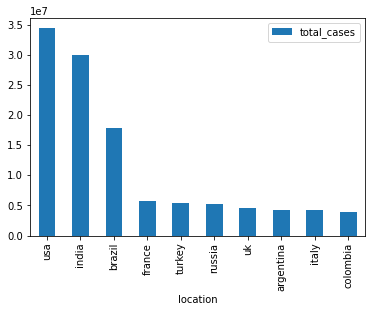

In [175]:
df=df.sort_values(by='total_cases',ascending=False)
df=df.iloc[0:10,:]
df.plot.bar()

### Working with CSV Data

In [176]:
# Import Our World in Data CSV
# https://github.com/owid/covid-19-data/tree/master/public/data
owid_df = pd.read_csv('owid-covid-data-updated.csv')
# Create Numpy array of unique countries
country_df = owid_df.location.unique()
country_df# Show countries
country_df.size # How many countries (219)
print(owid_df.columns) # Show all columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

### Covid Cases Worldwide

Total Cases Worldwide


<AxesSubplot:xlabel='date'>

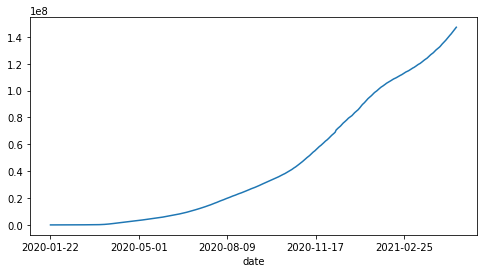

In [177]:
world_df=owid_df.loc[owid_df['location']=='World'][['date','total_cases','total_deaths','new_cases','new_deaths']]
world_df.set_index('date',inplace=True)
wdf_tc=world_df['total_cases']
wdf_td=world_df['total_deaths']
wdf_nc=world_df['new_cases']
wdf_nd=world_df['new_deaths']
print("Total Cases Worldwide")
wdf_tc.plot(figsize=(8,4))

Total Deaths Worldwide


<AxesSubplot:xlabel='date'>

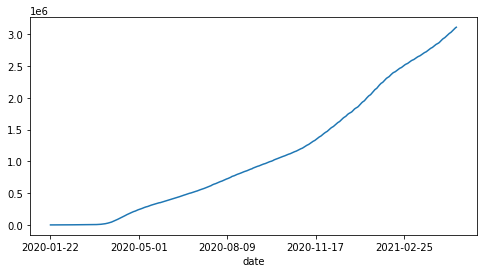

In [178]:
print("Total Deaths Worldwide")
wdf_td.plot(figsize=(8,4))

New Cases Worldwide


<AxesSubplot:xlabel='date'>

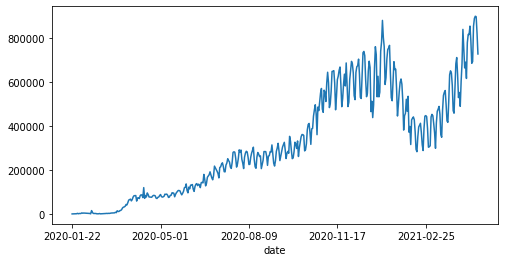

In [179]:
print("New Cases Worldwide")
wdf_nc.plot(figsize=(8,4))

New Deaths Worldwide


<AxesSubplot:xlabel='date'>

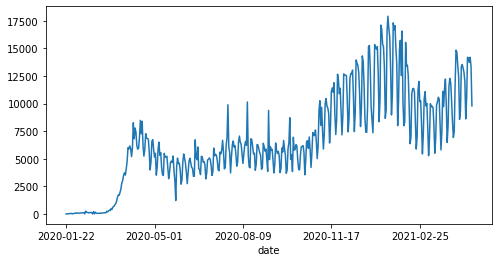

In [180]:
print("New Deaths Worldwide")
wdf_nd.plot(figsize=(8,4))

### Trends in Countries with Most Covid Cases

<AxesSubplot:xlabel='date'>

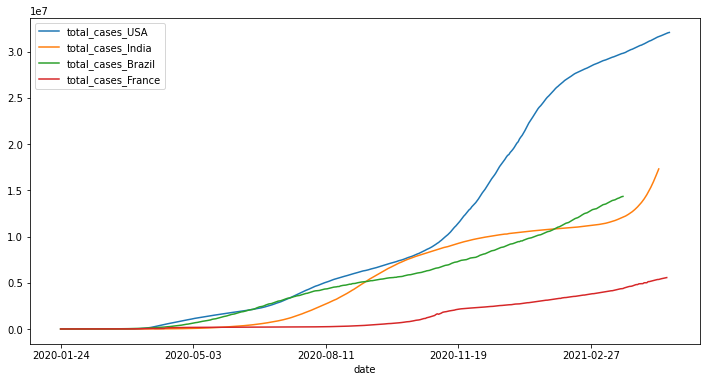

In [181]:
#Constructing dataframes for the top 4 countries with most covid cases
us_df=owid_df.loc[owid_df['location']=='United States'][['date','total_cases']]
ind_df=owid_df.loc[owid_df['location']=='India'][['date','total_cases']]
braz_df=owid_df.loc[owid_df['location']=='Brazil'][['date','total_cases']]
fran_df=owid_df.loc[owid_df['location']=='France'][['date','total_cases']]

#Renaming the columns
us_df.columns=['date','total_cases_USA']
ind_df.columns=['date','total_cases_India']
braz_df.columns=['date','total_cases_Brazil']
fran_df.columns=['date','total_cases_France']

#Setting date as index
us_df.set_index('date',inplace=True)
ind_df.set_index('date',inplace=True)
braz_df.set_index('date',inplace=True)
fran_df.set_index('date',inplace=True)

#Plotting the dataframes on a single graph
ax = us_df.plot(figsize=(12,6))
ind_df.plot(ax=ax,figsize=(12,6))
braz_df.plot(ax=ax,figsize=(12,6))
fran_df.plot(ax=ax,figsize=(12,6))


### Top 10 Countries with Most Deaths due to COVID

<AxesSubplot:xlabel='location'>

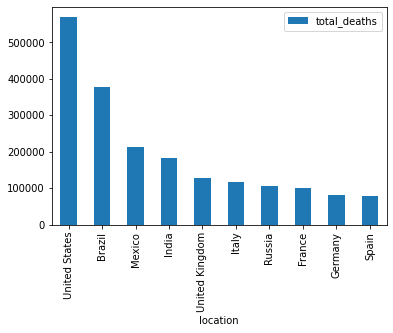

In [182]:
df=owid_df.loc[(owid_df['date']=='2021-04-20') & (owid_df['location']!='World')]
df=df.sort_values(by='total_deaths',ascending=False)[['continent','location','total_deaths']]
df=df.dropna()
df=df.iloc[0:10,1:3]
df.set_index('location',inplace=True)
df.plot.bar()

## Data Analysis

### Do lockdowns work?

Index(['new_cases_per_million'], dtype='object')
Index(['new_cases_per_million'], dtype='object')


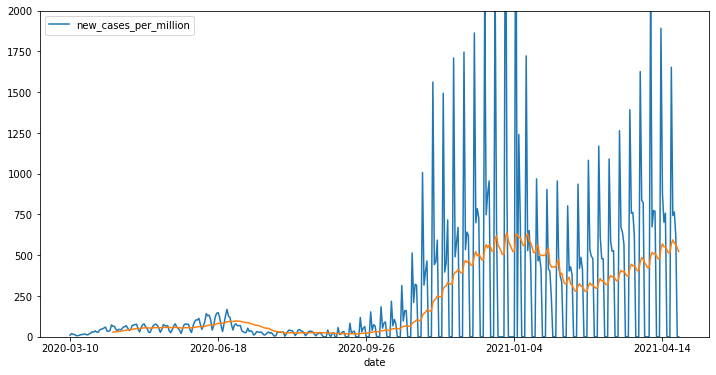

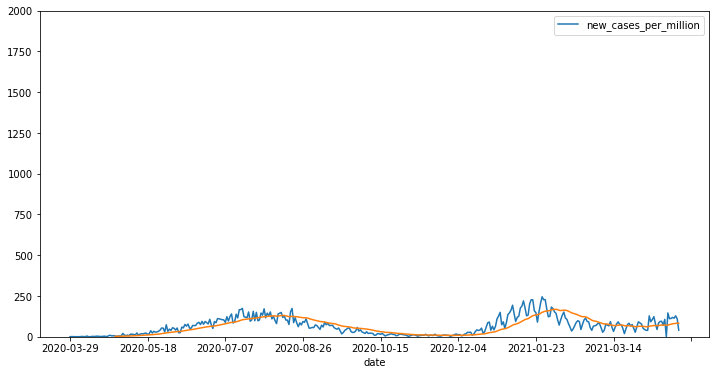

In [183]:
def plot_covid_data(country, col, plot_ma=False, y_max=2000):
    # Get indexes for location rows equal to country name
    indexer = owid_df[owid_df['location']==country].index
    # Get dataframe location and column data for country name
    country_df = owid_df.loc[indexer, 'date':col]
    # Delete NaN values
    country_df = country_df.dropna()
    # Set date as index
    country_df.set_index('date', inplace=True)
    # Remove all columns except for what I want
    country_df.drop(country_df.columns.difference([col]), 1, inplace=True)
    country_df.plot(figsize=(12,6), ylim=[0,y_max])

    # Plot moving average if requested
    if plot_ma:
        # Plot a 30 day moving average
        country_df.rolling(window=30).mean()[col].plot()
    print(country_df.columns)
    
# Least restrictive lockdown
plot_covid_data('Sweden', 'new_cases_per_million', True)
# Most restrictive lockdown measures
plot_covid_data('Bolivia', 'new_cases_per_million', True) 

# owid_df.columns

### How Does Median Age Affect Death Rate?

Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')


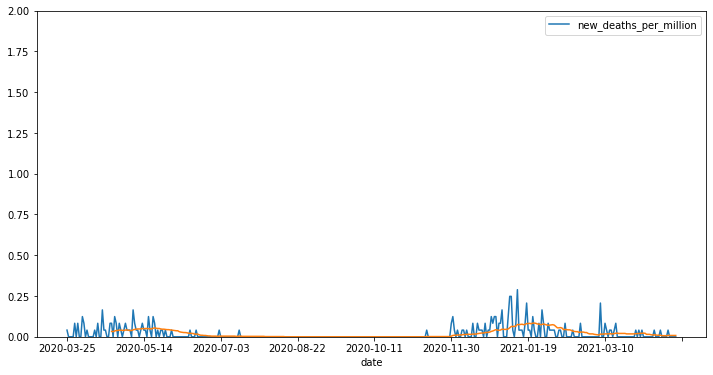

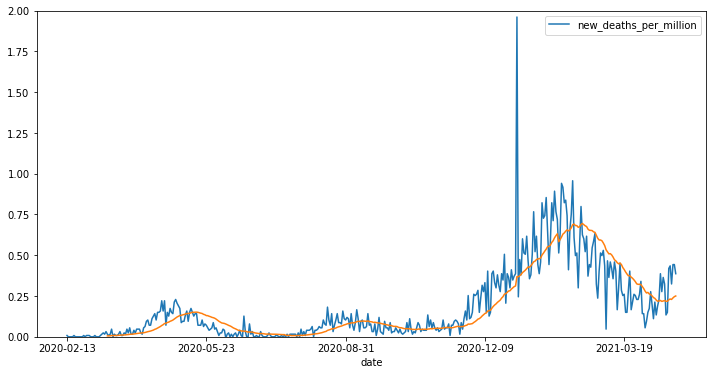

In [184]:
# Country with lowest median age
plot_covid_data('Niger', 'new_deaths_per_million', True, 2)
# Country with highest median age
plot_covid_data('Japan', 'new_deaths_per_million', True, 2)

### How Does Obesity Affect Death Rate?

Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')


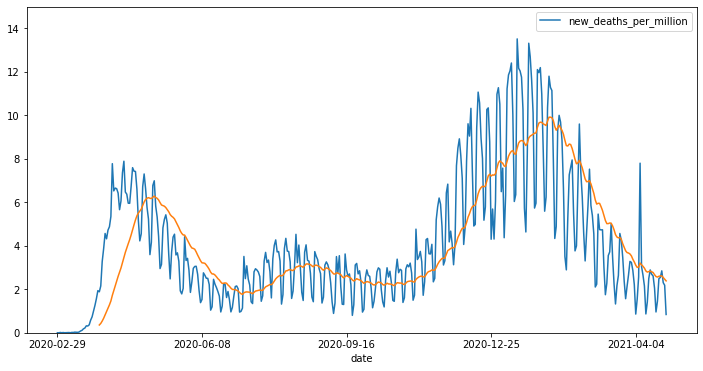

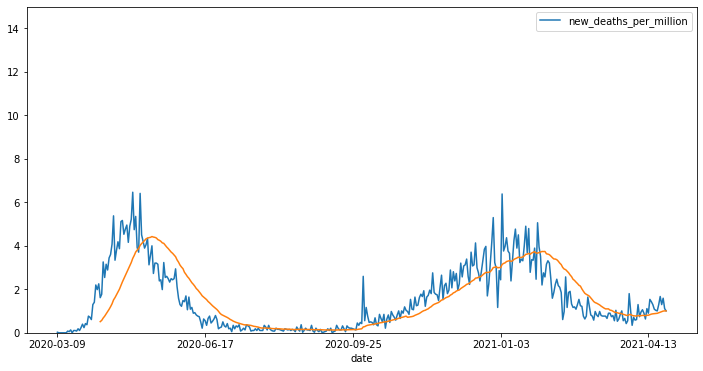

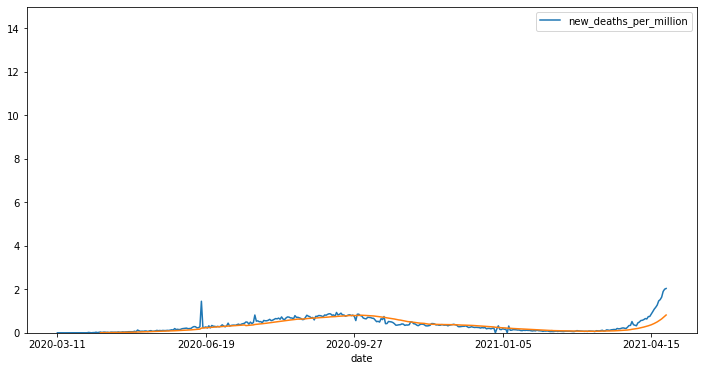

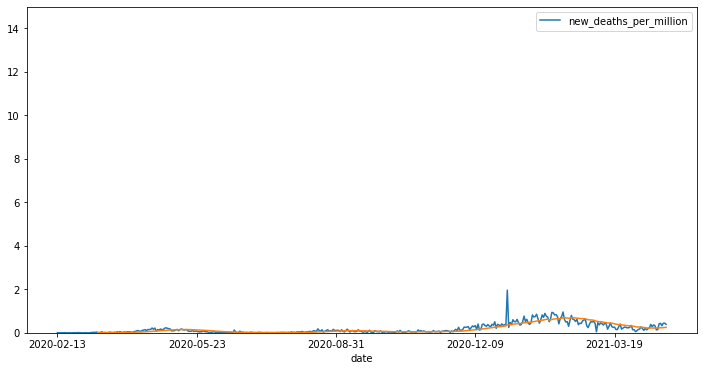

In [185]:
# Countries with very high percentages 
plot_covid_data('United States', 'new_deaths_per_million', True, 15)
plot_covid_data('Canada', 'new_deaths_per_million', True, 15)
# 2 countries with very low percentages
plot_covid_data('India', 'new_deaths_per_million', True, 15)
plot_covid_data('Japan', 'new_deaths_per_million', True, 15)

### How Does Diabetes Prevalence Affect Death?

Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')


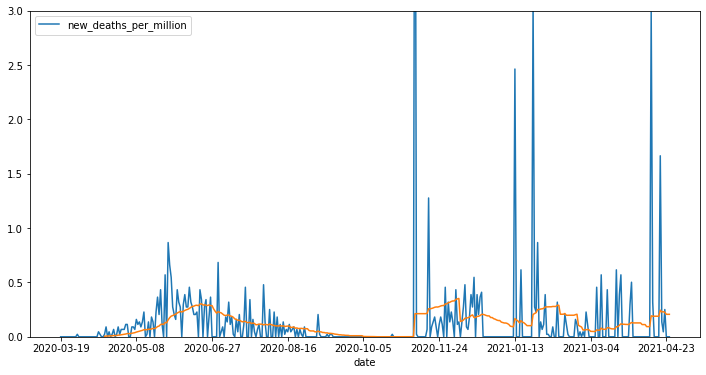

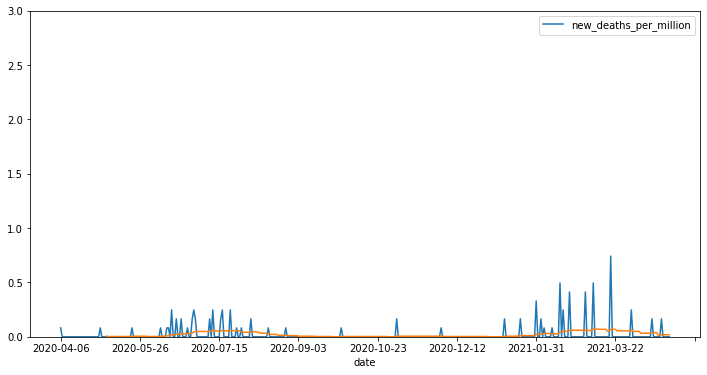

In [186]:
# Country with highest percentage 
plot_covid_data('Sudan', 'new_deaths_per_million', True, 3)
# Country with lowest percentage
plot_covid_data('Benin', 'new_deaths_per_million', True, 3)

### Does More Testing Slow Deathrate?

Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')


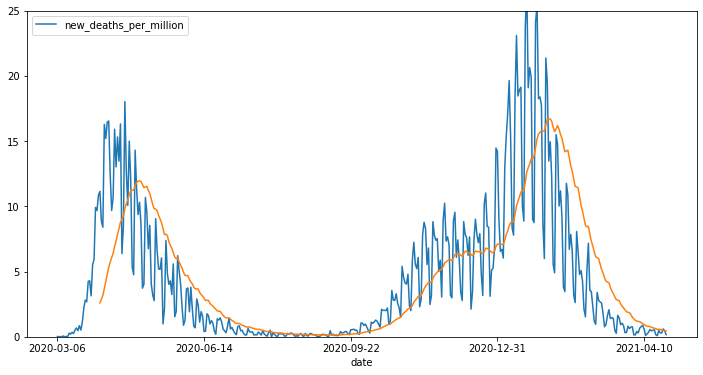

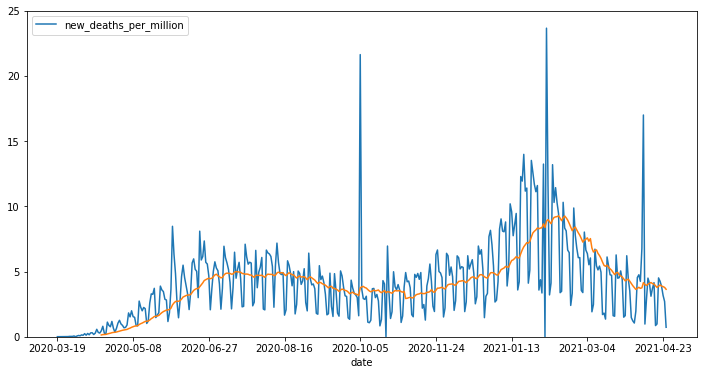

In [187]:
# Country with very high percentage 
plot_covid_data('United Kingdom', 'new_deaths_per_million', True, 25)
# Country with very low percentage
plot_covid_data('Mexico', 'new_deaths_per_million', True, 25)

##### Through all these visualizations we can somewhat infer that (may not be always true) :
    Lockdowns help in controlling covid cases
    Countries with higher obesity percentage have higher death rate
    Countries with higher diabetes prevalence have higher death rate

## Predictions Using Different Regression Models

### Preprocessing

In [188]:
from sklearn.model_selection import train_test_split
# To predict total covid cases in the world
wdf=owid_df.loc[owid_df['location']=='World'][['date','total_cases']]
wdf.set_index('date',inplace=True)
#converting date to day(integer) for applying regression models
day= np.arange(wdf['total_cases'].size)
wdf['day']=day
wdf

,total_cases,day
date,,
2020-01-22,557.0,0
2020-01-23,655.0,1
2020-01-24,941.0,2
2020-01-25,1433.0,3
2020-01-26,2118.0,4
...,...,...
2021-04-21,143842820.0,455
2021-04-22,144742575.0,456
2021-04-23,145640414.0,457


In [189]:
#Splitting the data into train and test set
X=np.arange(len(wdf['day']))
X=X.reshape(-1,1)
y=wdf.total_cases
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Linear Regression

In [190]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [191]:
#Training the model
LinReg = linear_model.LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [192]:
#Testing the model's performance
from sklearn.model_selection import cross_val_score
predl=LinReg.predict(X_test) 
score= cross_val_score(LinearRegression(),X_test,y_test, cv=10)
print("Average Score=",np.average(score))
print("Mean Absolute error=",mean_absolute_error(predl,y_test))
print("Root Mean Squared error=",np.sqrt(mean_squared_error(predl,y_test)))

Average Score= 0.7242361106830928
Mean Absolute error= 12503464.391683415
Root Mean Squared error= 13974534.81978148


In [193]:
#To predict the total cases in next 10 days starting from day 460
X_predict=np.arange(460,470)
X_predict=X_predict.reshape(-1,1)

Evaluation for next 10 days in future in Linear Regression:
day [460] = 120718997
day [461] = 121045077
day [462] = 121371157
day [463] = 121697237
day [464] = 122023317
day [465] = 122349397
day [466] = 122675477
day [467] = 123001557
day [468] = 123327637
day [469] = 123653717


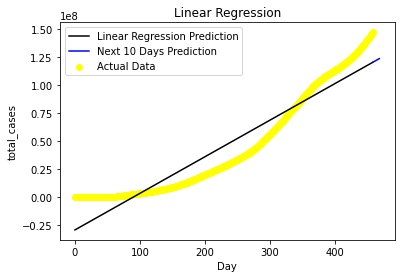

In [194]:
#Next 10 days Prediction with Visualization
print('Evaluation for next 10 days in future in Linear Regression:')
for i in X_predict:
  print('day',i,'=',int(LinReg.predict([i])))
plt.scatter(X, y, color = 'yellow')   
plt.plot(X,LinReg.predict(X), color = 'black') 
plt.plot(X_predict,LinReg.predict(X_predict), color = 'blue') 
plt.title('Linear Regression') 
plt.xlabel('Day') 
plt.ylabel('total_cases') 
plt.legend(["Linear Regression Prediction","Next 10 Days Prediction","Actual Data"])
plt.show()

### Polynomial Regression

In [195]:
from sklearn.preprocessing import PolynomialFeatures

In [196]:
#Testing the model's performance for degree 2 and 3 polynomial regression
polynom2 = PolynomialFeatures(degree =2) 
X_polynom_test2 = polynom2.fit_transform(X_test)
polynom3 = PolynomialFeatures(degree =3) 
X_polynom_test3 = polynom3.fit_transform(X_test)

scores2 = cross_val_score(LinearRegression(),X_polynom_test2,y_test, cv=10)
print("Average score for degree 2=",np.average(scores2))
scores3 = cross_val_score(LinearRegression(),X_polynom_test3,y_test, cv=10)
print("Average score for degree 3=",np.average(scores3))

Average score for degree 2= 0.9906464297952347
Average score for degree 3= 0.9915315154742299


In [197]:
#Training the model for degree 2
X_polynom_train2= polynom2.fit_transform(X_train)
X_polynom=polynom2.fit_transform(X)
PolyReg2 = LinearRegression() 
PolyReg2.fit(X_polynom_train2, y_train)
predp2=PolyReg2.predict(X_polynom_test2)

Evaluation for expecting 10 days in future in Polynomial Regression:
day [460] = 151688868
day [461] = 152423218
day [462] = 153159336
day [463] = 153897220
day [464] = 154636873
day [465] = 155378293
day [466] = 156121480
day [467] = 156866435
day [468] = 157613158
day [469] = 158361648


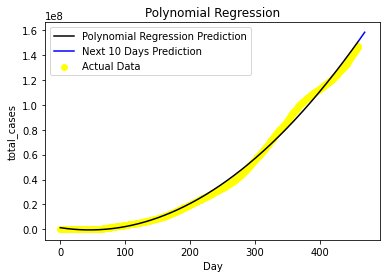

In [198]:
#Next 10 days Prediction with Visualization
print('Evaluation for expecting 10 days in future in Polynomial Regression:')
X_predict_polynom= polynom2.fit_transform(X_predict)
for i in X_predict:
  print('day',i,'=',int(PolyReg2.predict(polynom2.fit_transform([i]))))
plt.scatter(X, y, color = 'yellow')   
plt.plot(X,PolyReg2.predict(X_polynom), color = 'black') 
plt.plot(X_predict,PolyReg2.predict(X_predict_polynom), color = 'blue') 
plt.title('Polynomial Regression') 
plt.xlabel('Day') 
plt.ylabel('total_cases') 
plt.legend(["Polynomial Regression Prediction","Next 10 Days Prediction","Actual Data"])
plt.show()

In [199]:
#Training the model for degree 3
X_polynom_train3= polynom3.fit_transform(X_train)
X_polynom=polynom3.fit_transform(X)
PolyReg3 = LinearRegression() 
PolyReg3.fit(X_polynom_train3, y_train)
predp3=PolyReg3.predict(X_polynom_test3)

Evaluation for expecting 10 days in future in Polynomial Regression(degree=3):
day [460] = 149116796
day [461] = 149783161
day [462] = 150450559
day [463] = 151118987
day [464] = 151788441
day [465] = 152458918
day [466] = 153130415
day [467] = 153802929
day [468] = 154476456
day [469] = 155150994


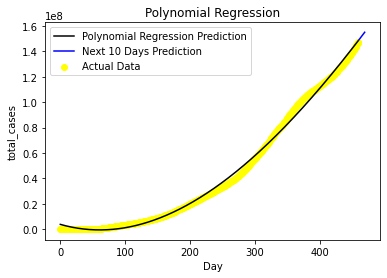

In [200]:
#Next 10 days Prediction with Visualization
print('Evaluation for expecting 10 days in future in Polynomial Regression(degree=3):')
X_predict_polynom= polynom3.fit_transform(X_predict)
for i in X_predict:
  print('day',i,'=',int(PolyReg3.predict(polynom3.fit_transform([i]))))
plt.scatter(X, y, color = 'yellow')   
plt.plot(X,PolyReg3.predict(X_polynom), color = 'black') 
plt.plot(X_predict,PolyReg3.predict(X_predict_polynom), color = 'blue') 
plt.title('Polynomial Regression') 
plt.xlabel('Day') 
plt.ylabel('total_cases') 
plt.legend(["Polynomial Regression Prediction","Next 10 Days Prediction","Actual Data"])
plt.show()

### Support Vector Regression (SVR)

In [201]:
from sklearn.svm import SVR

In [202]:
SVR_Regressor_1 = SVR(kernel='rbf')
SVR_Regressor_2 = SVR(kernel='poly',degree=2)
SVR_Regressor_3 = SVR(kernel='linear')
SVR_Regressor_4 = SVR(kernel='poly',degree=3)
SVR_Regressor_5 = SVR(kernel='poly',degree=4)

In [203]:
#Testing the model's performance for different parameters
score1 = cross_val_score(SVR(kernel='rbf'),X_test,y_test, cv=10)
print(np.average(score1))
score2 = cross_val_score(SVR(kernel='poly',degree=2),X_test,y_test, cv=10)
print(np.average(score2))
score3 = cross_val_score(SVR(kernel='linear'),X_test,y_test, cv=10)
print(np.average(score3))
score4 = cross_val_score(SVR(kernel='poly',degree=3),X_test,y_test, cv=10)
print(np.average(score4))
score5 = cross_val_score(SVR(kernel='poly',degree=4),X_test,y_test, cv=10)
print(np.average(score5))

-0.5938879855861232
-0.5938148683754495
-0.5106552672977356
-0.5931082929469488
-0.5861535800286538


In [204]:
#This model is inadequate for the given data(negative score)
#Training the third model among the five(least negative score)
SVR_Regressor_3.fit(X_train, y_train)

SVR(kernel='linear')

Evaluation for expecting 10 days in future in Support Vector Regression:
day [460] = 36335560
day [461] = 36378606
day [462] = 36421652
day [463] = 36464698
day [464] = 36507744
day [465] = 36550790
day [466] = 36593836
day [467] = 36636882
day [468] = 36679928
day [469] = 36722974


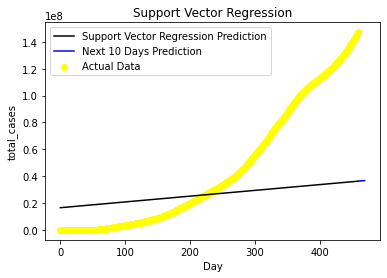

In [205]:
#Next 10 days Prediction with Visualization
print('Evaluation for expecting 10 days in future in Support Vector Regression:')
for i in X_predict:
  print('day',i,'=',int(SVR_Regressor_3.predict([i])))
plt.scatter(X, y, color = 'yellow')   
plt.plot(X,SVR_Regressor_3.predict(X), color = 'black') 
plt.plot(X_predict,SVR_Regressor_3.predict(X_predict), color = 'blue') 
plt.title('Support Vector Regression') 
plt.xlabel('Day') 
plt.ylabel('total_cases') 
plt.legend(["Support Vector Regression Prediction","Next 10 Days Prediction","Actual Data"])
plt.show()

### Random Forest Regression

In [206]:
from sklearn.ensemble import RandomForestRegressor
#Testing the model's performance
scorerf = cross_val_score(RandomForestRegressor(n_estimators=20),X_test,y_test, cv=10)
print(np.average(scorerf))

0.9992193856546343


In [207]:
#Training the model
RandfReg= RandomForestRegressor(n_estimators=20)
RandfReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20)

Evaluation for expecting 10 days in future in Random Forest Regression:
day [460] = 145957418
day [461] = 145957418
day [462] = 145957418
day [463] = 145957418
day [464] = 145957418
day [465] = 145957418
day [466] = 145957418
day [467] = 145957418
day [468] = 145957418
day [469] = 145957418


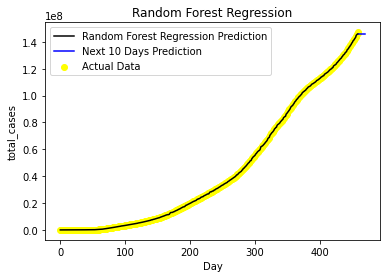

In [208]:
#Next 10 days Prediction with Visualization
print('Evaluation for expecting 10 days in future in Random Forest Regression:')
for i in X_predict:
  print('day',i,'=',int(RandfReg.predict([i])))
plt.scatter(X, y, color = 'yellow')   
plt.plot(X,RandfReg.predict(X), color = 'black') 
plt.plot(X_predict,RandfReg.predict(X_predict), color = 'blue') 
plt.title('Random Forest Regression') 
plt.xlabel('Day') 
plt.ylabel('total_cases') 
plt.legend(["Random Forest Regression Prediction","Next 10 Days Prediction","Actual Data"])
plt.show()

Although Random Forest Regressor gave the best score in the range of actual data but it failed to predict for the future days
giving the same result for each day after the actual data.
Support Vector Regressor couldn't fit well with the data giving a negative score.
Polynomial Regressor works the best for the given data.

### Estimating the Time Required for India to be Fully Vaccinated

In [209]:
#Creating a new dataframe for total no. of people vaccinated in India
ind_df=owid_df.loc[owid_df['location']=='India'][['date','people_fully_vaccinated']]
ind_df=ind_df.dropna()
ind_df.set_index('date',inplace=True)
day= np.arange(ind_df['people_fully_vaccinated'].size)
ind_df['day']=day
ind_df

,people_fully_vaccinated,day
date,,
2021-02-13,7668.0,0
2021-02-15,98118.0,1
2021-02-16,216339.0,2
2021-02-17,342116.0,3
2021-02-18,464932.0,4
...,...,...
2021-04-18,16480796.0,63
2021-04-19,17469932.0,64
2021-04-21,17972744.0,65


In [210]:
#To estimate people fully vaccinated on a given day
X=np.arange(len(ind_df['day']))
X=X.reshape(-1,1)
y=ind_df.people_fully_vaccinated
#Training the model with polynomial regression of degree 2
poly2 = PolynomialFeatures(degree =2) 
X_poly=poly2.fit_transform(X)
Poly2 = LinearRegression() 
Poly2.fit(X_poly, y)

LinearRegression()

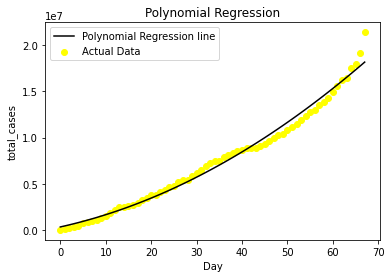

In [211]:
#Visualization of the data
plt.scatter(X, y, color = 'yellow')   
plt.plot(X,Poly2.predict(X_poly), color = 'black') 
plt.title('Polynomial Regression') 
plt.xlabel('Day') 
plt.ylabel('total_cases') 
plt.legend(["Polynomial Regression line","Actual Data"])
plt.show()

In [212]:
#Finding the estimated day range when total people vaccinated = estimated population of India
X_predict=np.arange(730,760)
X_predict=X_predict.reshape(-1,1)
X_predict_poly= poly2.fit_transform(X_predict)
for i in X_predict:
  print('day',i,'=',int(Poly2.predict(poly2.fit_transform([i]))))

day [730] = 1327629905
day [731] = 1331159411
day [732] = 1334693599
day [733] = 1338232469
day [734] = 1341776021
day [735] = 1345324255
day [736] = 1348877171
day [737] = 1352434769
day [738] = 1355997049
day [739] = 1359564012
day [740] = 1363135656
day [741] = 1366711982
day [742] = 1370292991
day [743] = 1373878681
day [744] = 1377469054
day [745] = 1381064108
day [746] = 1384663845
day [747] = 1388268263
day [748] = 1391877364
day [749] = 1395491147
day [750] = 1399109611
day [751] = 1402732758
day [752] = 1406360587
day [753] = 1409993098
day [754] = 1413630291
day [755] = 1417272166
day [756] = 1420918723
day [757] = 1424569962
day [758] = 1428225883
day [759] = 1431886486


##### Assuming population of India to be around 140 crore, estimated number of days since 13-02-2021 (day 0) for India to be fully vaccinated is around 750 (around 2 years). 